In [1]:
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
from google.colab import files


uploaded = files.upload()


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Data-cleaning-for-beginners-using-pandas.csv']))
print(df)

    Index   Age      Salary  Rating       Location  Established Easy Apply
0       0  44.0   $44k-$99k     5.4       India,In         1999       TRUE
1       1  66.0   $55k-$66k     3.5    New York,Ny         2002       TRUE
2       2   NaN   $77k-$89k    -1.0    New York,Ny           -1         -1
3       3  64.0   $44k-$99k     4.4       India In         1988         -1
4       4  25.0   $44k-$99k     6.4  Australia Aus         2002         -1
5       5  44.0   $77k-$89k     1.4       India,In         1999       TRUE
6       6  21.0   $44k-$99k     0.0    New York,Ny           -1         -1
7       7  44.0   $44k-$99k    -1.0  Australia Aus           -1         -1
8       8  35.0   $44k-$99k     5.4    New York,Ny           -1         -1
9       9  22.0   $44k-$99k     7.7       India,In           -1       TRUE
10     10  55.0   $10k-$49k     5.4       India,In         2008       TRUE
11     11  44.0   $10k-$49k     6.7       India,In         2009         -1
12     12   NaN   $44k-$9

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [ ]:
print("After handling missing values:")
print(df.isnull().sum())

After handling missing values:
Index          0
Age            0
Salary         0
Rating         0
Location       0
Established    0
Easy Apply     0
dtype: int64


In [ ]:

df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')


df['Established'] = pd.to_datetime(df['Established'], errors='coerce')


df['Easy Apply'] = df['Easy Apply'].astype(bool)


print("Data Types After Alignment:")
print(df.dtypes)


Data Types After Alignment:
Index                   int64
Age                   float64
Salary                float64
Rating                float64
Location               object
Established    datetime64[ns]
Easy Apply               bool
dtype: object


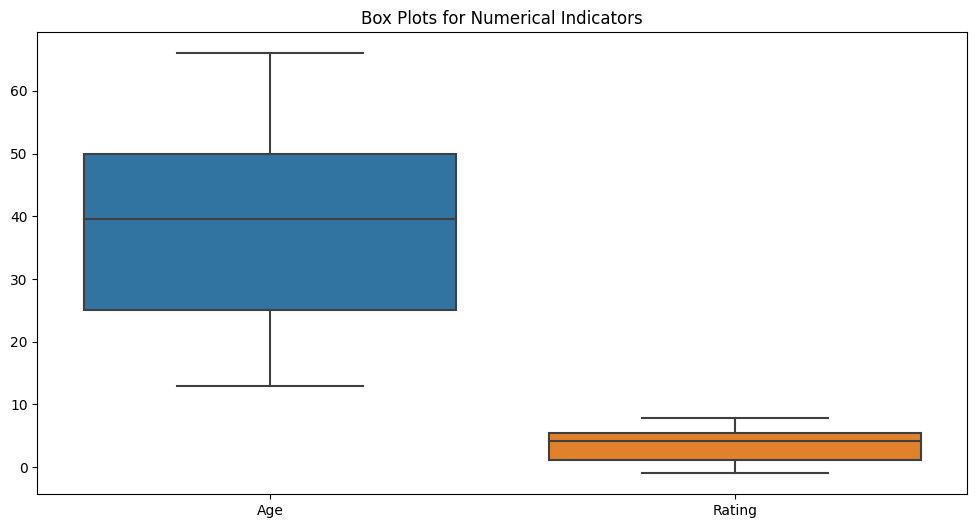

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df = pd.read_csv("Data-cleaning-for-beginners-using-pandas.csv")
sns.boxplot(data = df[['Age', 'Salary', 'Rating']])
plt.title("Box Plots for Numerical Indicators")
plt.show()


In [ ]:



data = {'Salary': ['$44k-$99k', '$55k-$66k', '$77k-$89k', '$44k-$99k', '$44k-$99k', '$77k-$89k', '$44k-$99k', '$44k-$99k', '$44k-$99k', '$44k-$99k', '$10k-$49k', '$10k-$49k', '$44k-$99k', '$44k-$99k', '$44k-$99k', '$88k-$101k', '$19k-$40k', '$44k-$99k', '$44k-$99k', '$44k-$99k', '$44k-$99k', '$44k-$99k', '$55k-$66k', '$44k-$99k', '$44k-$99k', '$44k-$99k', '$55k-$66k', '$44k-$99k', '$39k-$88k']}


df = pd.read_csv("Data-cleaning-for-beginners-using-pandas.csv")


df[['Lower', 'Upper']] = df['Salary'].str.extract(r'\$(\d+)k-\$(\d+)k').astype(float)


df['Median salary'] = ((df['Lower'] + df['Upper']) / 2) * 10000


df = df[['Median salary']]


df.to_csv('median_salary_data_in_10000s.csv', index=False)


print(df)




    Median salary
0        715000.0
1        605000.0
2        830000.0
3        715000.0
4        715000.0
5        830000.0
6        715000.0
7        715000.0
8        715000.0
9        715000.0
10       295000.0
11       295000.0
12       715000.0
13       715000.0
14       715000.0
15       945000.0
16       295000.0
17       715000.0
18       715000.0
19       715000.0
20       715000.0
21       715000.0
22       605000.0
23       715000.0
24       715000.0
25       715000.0
26       605000.0
27       715000.0
28       635000.0


In [ ]:
if 'Median salary' in df.columns:
    median_salary = df['Median salary'].median()
    df['Median salary'] = df['Median salary'].apply(lambda x: median_salary if x < 0 or x > 1000000 else x)

In [ ]:

median_rating = df['Rating'].median()
df['Rating'] = df['Rating'].apply(lambda x: median_rating if x < 0 or x > 5 else x)


In [ ]:



df = pd.read_csv('Data-cleaning-for-beginners-using-pandas.csv')


unique_locations = df['Location'].unique()
print("Unique Locations:")
print(unique_locations)


df['Location'] = df['Location'].str.split(',').str[0].str.lower()
df['Location'] = df['Location'].apply(lambda x: ' '.join([word for word in x.split() if word in ['india', 'australia', 'new', 'york']]))


print("\nDataFrame with Standardized Location Entries:")
print(df[['Location']])

df.to_csv('standardized_location_data.csv', index=False)


Unique Locations:
['India,In' 'New York,Ny' 'India In' 'Australia Aus']

DataFrame with Standardized Location Entries:
     Location
0       india
1    new york
2    new york
3       india
4   australia
5       india
6    new york
7   australia
8    new york
9       india
10      india
11      india
12      india
13  australia
14  australia
15  australia
16      india
17   new york
18   new york
19   new york
20   new york
21   new york
22   new york
23   new york
24   new york
25  australia
26      india
27      india
28  australia


In [ ]:

import random
df = pd.read_csv(io.BytesIO(uploaded['Data-cleaning-for-beginners-using-pandas.csv']))

df['Established'] = pd.to_numeric(df['Established'], errors='coerce')

def replace_negative_with_random_year(x):
    if pd.isna(x) or x < 0:
        return random.randint(1900, 2022)
    else:
        return x

df['Established'] = df['Established'].apply(replace_negative_with_random_year)


print("\nDataFrame after Addressing Inconsistencies and Filling with Random Years:")
print(df[['Established']])




DataFrame after Addressing Inconsistencies and Filling with Random Years:
    Established
0          1999
1          2002
2          1912
3          1988
4          2002
5          1999
6          1969
7          1970
8          1931
9          1977
10         2008
11         2009
12         1999
13         2019
14         2020
15         1999
16         1984
17         1943
18         1954
19         1955
20         1944
21         1946
22         1988
23         1999
24         1987
25         1980
26         1934
27         1935
28         1932


In [ ]:

import random


df['Rating'] = df['Rating'].replace(-1.0, np.nan)


df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


def generate_random_rating():
    return round(random.uniform(1, 10), 1)  # Adjust the range as needed


df['Rating'].fillna(generate_random_rating(), inplace=True)


print("\nDataFrame after Handling Invalid Values and Filling with Random Ratings:")
print(df[['Rating']])



DataFrame after Handling Invalid Values and Filling with Random Ratings:
    Rating
0      5.4
1      3.5
2      4.6
3      4.4
4      6.4
5      1.4
6      0.0
7      4.6
8      5.4
9      7.7
10     5.4
11     6.7
12     0.0
13     4.6
14     4.0
15     3.0
16     4.5
17     5.3
18     6.7
19     3.3
20     5.7
21     5.0
22     7.8
23     2.4
24     4.6
25     0.0
26     4.6
27     5.4
28     3.4


In [ ]:
print(df[['Age']])

     Age
0   44.0
1   66.0
2    NaN
3   64.0
4   25.0
5   44.0
6   21.0
7   44.0
8   35.0
9   22.0
10  55.0
11  44.0
12   NaN
13  25.0
14  66.0
15  44.0
16  19.0
17   NaN
18  35.0
19  32.0
20   NaN
21  35.0
22  19.0
23   NaN
24  13.0
25  55.0
26   NaN
27  52.0
28   NaN


Summary Statistics of 'Age' column before filling NaN:
count    22.000000
mean     39.045455
std      16.134781
min      13.000000
25%      25.000000
50%      39.500000
75%      50.000000
max      66.000000
Name: Age, dtype: float64

Summary Statistics of 'Age' column after filling NaN:
count    29.000000
mean     38.262069
std      14.044430
min      13.000000
25%      32.000000
50%      35.800000
75%      44.000000
max      66.000000
Name: Age, dtype: float64


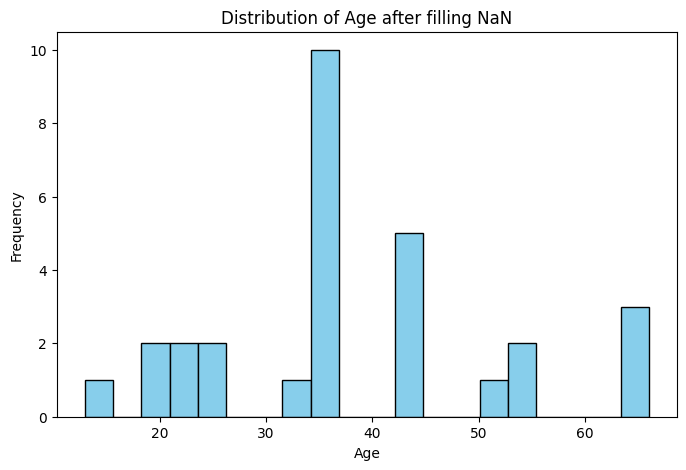

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming your dataset is stored in a DataFrame named 'df'
# Display summary statistics of the 'Age' column before filling NaN values
print("Summary Statistics of 'Age' column before filling NaN:")
print(df['Age'].describe())

# Function to generate a random age
def generate_random_age():
    return round(random.uniform(18, 65), 1)  # Adjust the age range as needed

# Fill NaN values in 'Age' with random ages
df['Age'].fillna(generate_random_age(), inplace=True)

# Display summary statistics of the 'Age' column after filling NaN values
print("\nSummary Statistics of 'Age' column after filling NaN:")
print(df['Age'].describe())

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age after filling NaN')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Assuming your dataset is stored in a DataFrame named 'df'
# Check for consistency between 'Established' and 'Age' columns
inconsistent_entries = df[df['Established'].notna() & df['Age'].notna() & (df['Established'] > df['Age'])]

# Display inconsistent entries
print("Inconsistent Entries between 'Established' and 'Age':")
print(inconsistent_entries[['Established', 'Age']])


Inconsistent Entries between 'Established' and 'Age':
    Established   Age
0          1999  44.0
1          2002  66.0
2          1912  35.8
3          1988  64.0
4          2002  25.0
5          1999  44.0
6          1969  21.0
7          1970  44.0
8          1931  35.0
9          1977  22.0
10         2008  55.0
11         2009  44.0
12         1999  35.8
13         2019  25.0
14         2020  66.0
15         1999  44.0
16         1984  19.0
17         1943  35.8
18         1954  35.0
19         1955  32.0
20         1944  35.8
21         1946  35.0
22         1988  19.0
23         1999  35.8
24         1987  13.0
25         1980  55.0
26         1934  35.8
27         1935  52.0
28         1932  35.8


In [ ]:
print(df[['Easy Apply']])

   Easy Apply
0        TRUE
1        TRUE
2          -1
3          -1
4          -1
5        TRUE
6          -1
7          -1
8          -1
9        TRUE
10       TRUE
11         -1
12         -1
13       TRUE
14       TRUE
15         -1
16         -1
17       TRUE
18       TRUE
19       TRUE
20       TRUE
21         -1
22       TRUE
23       TRUE
24         -1
25       TRUE
26       TRUE
27         -1
28         -1


In [ ]:

import random


data = {'Easy Apply': ['TRUE', 'TRUE', -1, -1, -1, 'TRUE', -1, -1, -1, 'TRUE', 'TRUE', -1, -1, 'TRUE', 'TRUE', -1, -1, 'TRUE', 'TRUE', 'TRUE', 'TRUE', -1, 'TRUE', 'TRUE', -1, 'TRUE', 'TRUE', -1, -1]}
df = pd.DataFrame(data)


df['Easy Apply'] = df['Easy Apply'].apply(lambda x: random.choice([True, False]) if x == -1 else x)


print(df)




   Easy Apply
0        TRUE
1        TRUE
2        True
3       False
4       False
5        TRUE
6        True
7       False
8       False
9        TRUE
10       TRUE
11      False
12      False
13       TRUE
14       TRUE
15      False
16       True
17       TRUE
18       TRUE
19       TRUE
20       TRUE
21       True
22       TRUE
23       TRUE
24      False
25       TRUE
26       TRUE
27      False
28      False
